In [33]:
from reader import read_data, split_data
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from pyESN import ESN

# pyESN on github : https://github.com/cknd/pyESN

In [2]:
# the data, shuffled and split between train, validation, and test sets

x, y1, y2, y3 = read_data('train_data/alpine-1.csv', shuffle=True)
x = preprocessing.scale(x)

train_set, valid_set, test_set = split_data(x, y1, y2, y3, 0.8, 0.1)

x_train, y1_train, y2_train, y3_train = train_set
x_valid, y1_valid, y2_valid, y3_valid = valid_set
x_test, y1_test, y2_test, y3_test = test_set

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


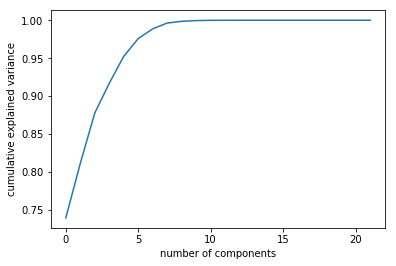

explained variance of first 7 components: 98.9 %
original shape:    (17046, 22)
transformed shape: (17046, 7)


(1706, 7)

In [32]:
# Use PCA to represent data in lower dim


## How many components ? 
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()



pca = PCA(n_components = 7).fit(x)
print("explained variance of first 7 components:",100* round(sum(pca.explained_variance_ratio_),3),"%")

## 7 seems reasonable as we still have 99 % of explained variance 

x_trans = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", x_trans.shape)


# data with transformed x

train_set, valid_set, test_set = split_data(x_trans, y1, y2, y3, 0.8, 0.1)

x_train, y1_train, y2_train, y3_train = train_set
x_valid, y1_valid, y2_valid, y3_valid = valid_set
x_test, y1_test, y2_test, y3_test = test_set



In [52]:
y1_train.shape

(13636,)

In [89]:
esn = ESN(n_inputs = 7,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 0.8,
          sparsity = 0.7,
          noise = 0.01,
          input_shift = None,
          input_scaling = None,
          teacher_scaling = 1.15,
          teacher_shift = -0.95,
          out_activation = np.tanh,
          inverse_out_activation = np.arctanh,
          random_state = None,
          silent = False)

pred_train = esn.fit(x_train,y2_train)

print("test error:")
pred_test = esn.predict(x_test)
print(np.sqrt(np.mean((pred_test - y2_test)**2)))

harvesting states...
fitting...
training error:
0.325103031384
test error:
0.389957645532
